## 🌅 🌇 Month Prediction from Sunrise/Sunset data

Given *data about daily sunrise and sunset in Toronto*, let's try to predict the **month** of a given record.

We will use logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/kapastor/sundown-and-sunset-data-20102020

### Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('archive/Sunup_Sundown_Data.csv')
data

,City,Date,Sunup,Sundown
0,toronto,2010-01-01,07:51,16:51
1,toronto,2010-01-02,07:51,16:52
2,toronto,2010-01-03,07:51,16:53
3,toronto,2010-01-04,07:51,16:54
4,toronto,2010-01-05,07:51,16:55
...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47
4014,toronto,2020-12-28,07:50,16:48
4015,toronto,2020-12-29,07:50,16:49
4016,toronto,2020-12-30,07:50,16:49


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     4018 non-null   object
 1   Date     4018 non-null   object
 2   Sunup    4018 non-null   object
 3   Sundown  4018 non-null   object
dtypes: object(4)
memory usage: 125.7+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df

,City,Date,Sunup,Sundown
0,toronto,2010-01-01,07:51,16:51
1,toronto,2010-01-02,07:51,16:52
2,toronto,2010-01-03,07:51,16:53
3,toronto,2010-01-04,07:51,16:54
4,toronto,2010-01-05,07:51,16:55
...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47
4014,toronto,2020-12-28,07:50,16:48
4015,toronto,2020-12-29,07:50,16:49
4016,toronto,2020-12-30,07:50,16:49


In [6]:
df['Month'] = df['Date'].apply(lambda x: x[5:7])

In [7]:
df

,City,Date,Sunup,Sundown,Month
0,toronto,2010-01-01,07:51,16:51,01
1,toronto,2010-01-02,07:51,16:52,01
2,toronto,2010-01-03,07:51,16:53,01
3,toronto,2010-01-04,07:51,16:54,01
4,toronto,2010-01-05,07:51,16:55,01
...,...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47,12
4014,toronto,2020-12-28,07:50,16:48,12
4015,toronto,2020-12-29,07:50,16:49,12
4016,toronto,2020-12-30,07:50,16:49,12


In [8]:
df['SunupHour'] = df['Sunup'].apply(lambda time: time[:2])
df['SunupMinute'] = df['Sunup'].apply(lambda time: time[-2:])

df['SundownHour'] = df['Sundown'].apply(lambda time: time[:2])
df['SundownMinute'] = df['Sundown'].apply(lambda time: time[-2:])

In [9]:
df

,City,Date,Sunup,Sundown,Month,SunupHour,SunupMinute,SundownHour,SundownMinute
0,toronto,2010-01-01,07:51,16:51,01,07,51,16,51
1,toronto,2010-01-02,07:51,16:52,01,07,51,16,52
2,toronto,2010-01-03,07:51,16:53,01,07,51,16,53
3,toronto,2010-01-04,07:51,16:54,01,07,51,16,54
4,toronto,2010-01-05,07:51,16:55,01,07,51,16,55
...,...,...,...,...,...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47,12,07,50,16,47
4014,toronto,2020-12-28,07:50,16:48,12,07,50,16,48
4015,toronto,2020-12-29,07:50,16:49,12,07,50,16,49
4016,toronto,2020-12-30,07:50,16:49,12,07,50,16,49


In [10]:
df['City'].unique()

array(['toronto'], dtype=object)

In [11]:
df = df.drop(['City', 'Date', 'Sunup', 'Sundown'], axis=1)

In [12]:
df

,Month,SunupHour,SunupMinute,SundownHour,SundownMinute
0,01,07,51,16,51
1,01,07,51,16,52
2,01,07,51,16,53
3,01,07,51,16,54
4,01,07,51,16,55
...,...,...,...,...,...
4013,12,07,50,16,47
4014,12,07,50,16,48
4015,12,07,50,16,49
4016,12,07,50,16,49


### Visualization

In [19]:
df = df.astype(int)

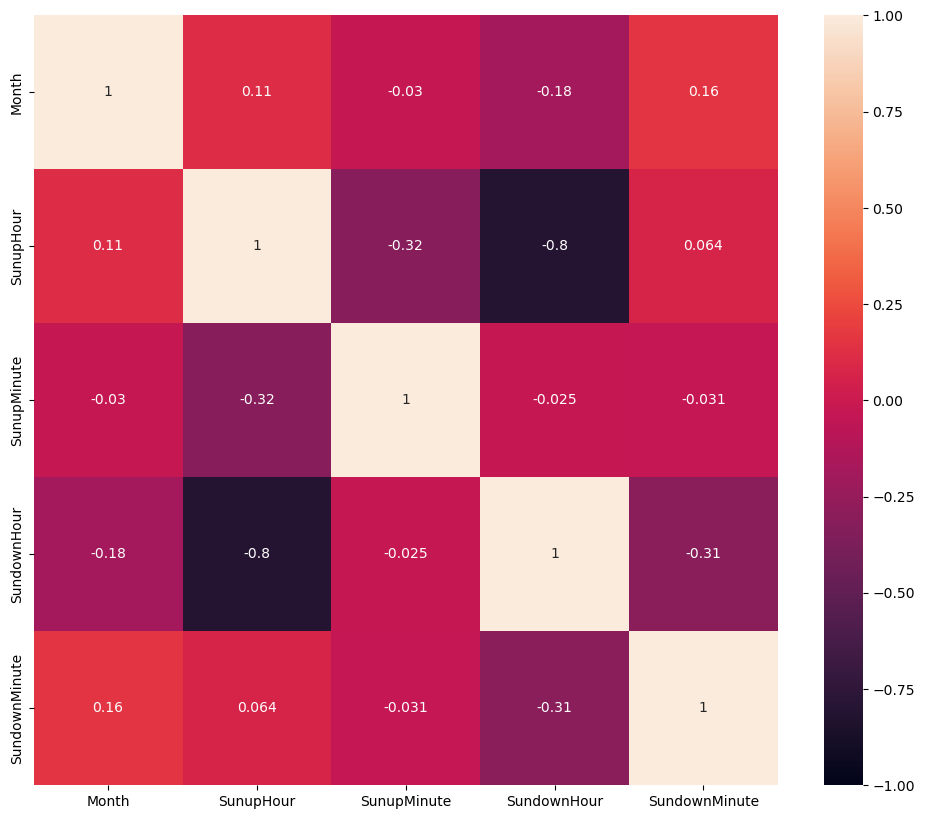

In [20]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap='rocket')
plt.show()

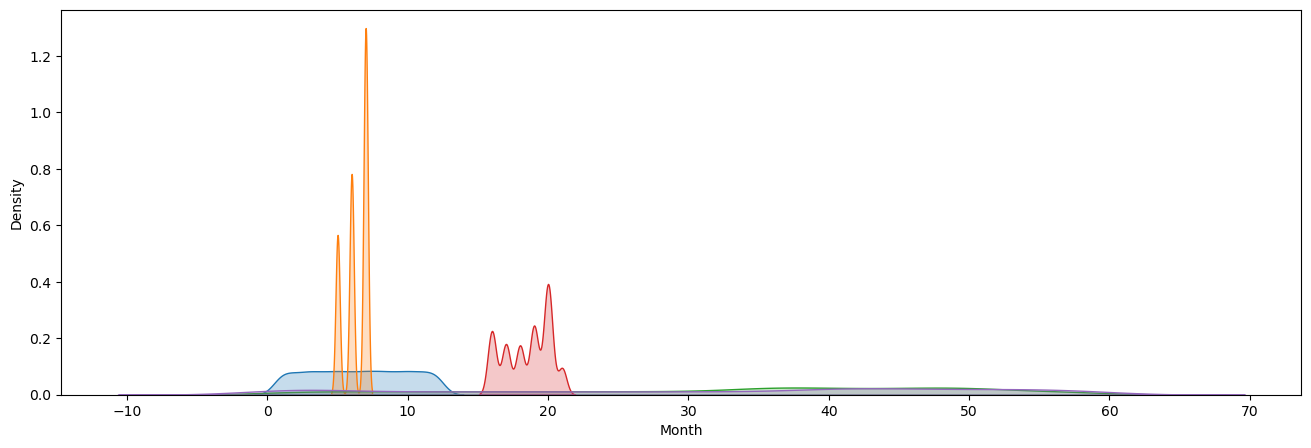

In [26]:
plt.figure(figsize=(16, 5))
for column in df.columns:
    sns.kdeplot(df[column], fill=True)
plt.show()

### Splitting and Scaling

In [27]:
y = df['Month'].copy()
X = df.drop('Month', axis=1)

In [28]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [29]:
X

array([[ 0.91284423,  1.10730273, -1.56544515,  1.04161911],
       [ 0.91284423,  1.10730273, -1.56544515,  1.09512152],
       [ 0.91284423,  1.10730273, -1.56544515,  1.14862392],
       ...,
       [ 0.91284423,  1.04589205, -1.56544515,  0.9346143 ],
       [ 0.91284423,  1.04589205, -1.56544515,  0.9346143 ],
       [ 0.91284423,  1.10730273, -1.56544515,  0.98811671]],
      shape=(4018, 4))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=122)

### Training

In [36]:
models = []
Cs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

for C in Cs:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    models.append(model)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable

In [37]:
models

[LogisticRegression(C=0.01),
 LogisticRegression(C=0.1),
 LogisticRegression(),
 LogisticRegression(C=10.0),
 LogisticRegression(C=100.0),
 LogisticRegression(C=1000.0),
 LogisticRegression(C=10000.0)]

### Results

In [39]:
model_acc = [model.score(X_test, y_test) for model in models]

print(f" Model Accuracy (C={Cs[0]}):", model_acc[0])
print(f" Model Accuracy (C={Cs[1]}):", model_acc[1])
print(f" Model Accuracy (C={Cs[2]}):", model_acc[2])
print(f" Model Accuracy (C={Cs[3]}):", model_acc[3])
print(f" Model Accuracy (C={Cs[4]}):", model_acc[4])
print(f" Model Accuracy (C={Cs[5]}):", model_acc[5])
print(f" Model Accuracy (C={Cs[6]}):", model_acc[6])

 Model Accuracy (C=0.01): 0.5174129353233831
 Model Accuracy (C=0.1): 0.6990049751243781
 Model Accuracy (C=1.0): 0.8167495854063018
 Model Accuracy (C=10.0): 0.9369817578772802
 Model Accuracy (C=100.0): 0.9527363184079602
 Model Accuracy (C=1000.0): 0.9461028192371476
 Model Accuracy (C=10000.0): 0.9444444444444444
